In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [ ]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Вычисление "скорректировнного R2"
    # Сначала вычислим коэффициент детерминации R2
    r2 = model.score(X_test, y_test)
    # Размер тестовой выборки
    n = X_test.shape[0]
    # Количество признаков
    p = X_test.shape[1]
    # Вычислим "Скорректировнный R2"
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(), 4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [ ]:
dtf = pd.read_csv('/content/winequality-red.csv')
dtf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


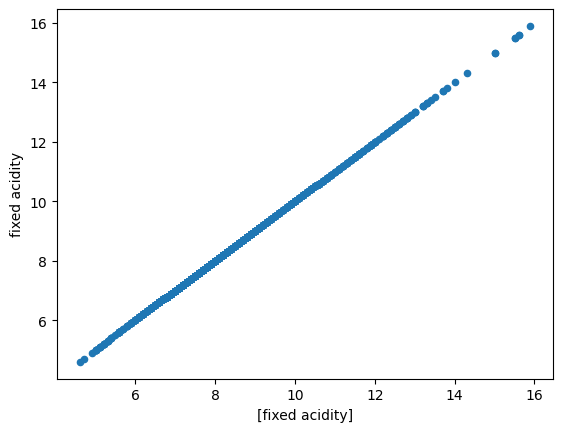

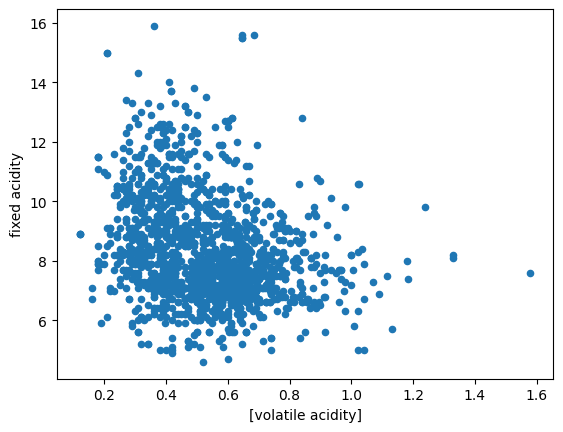

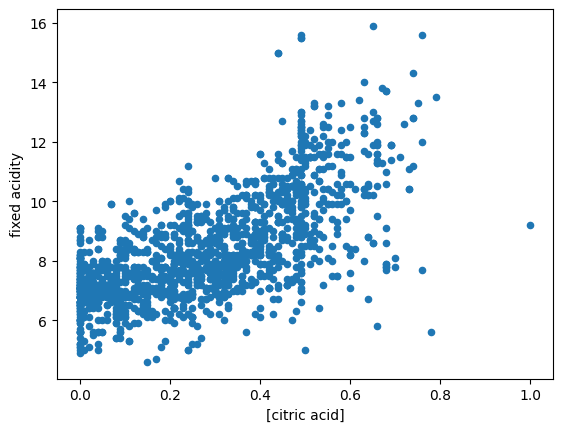

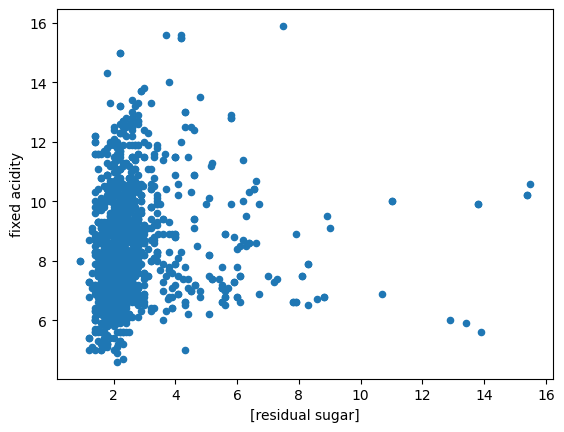

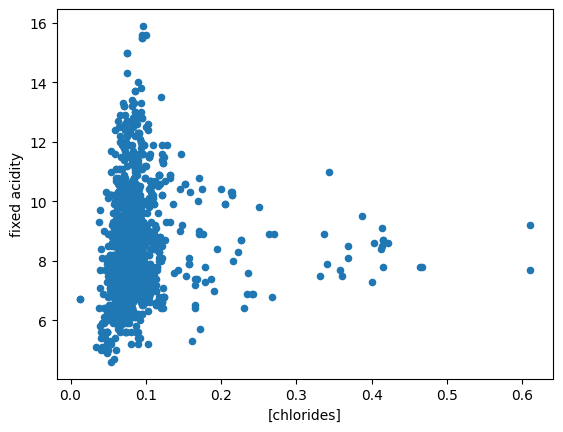

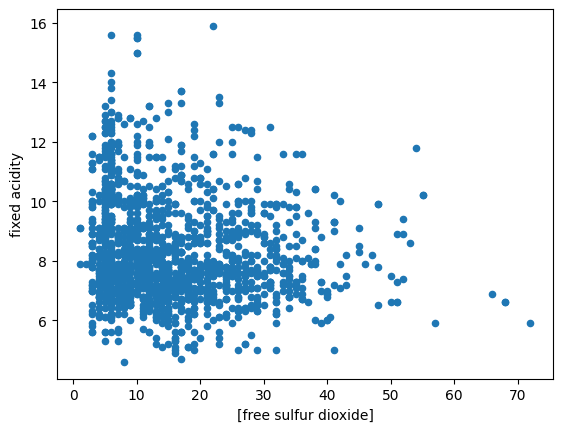

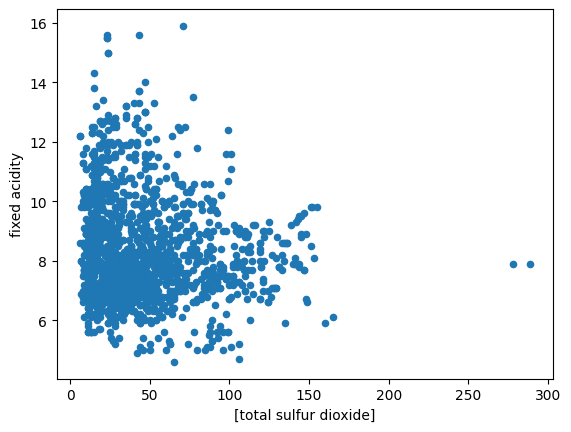

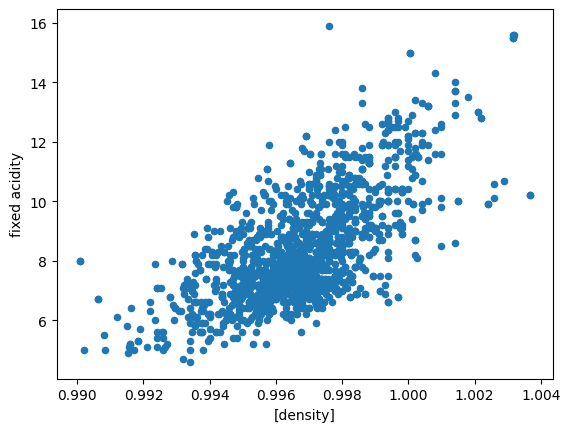

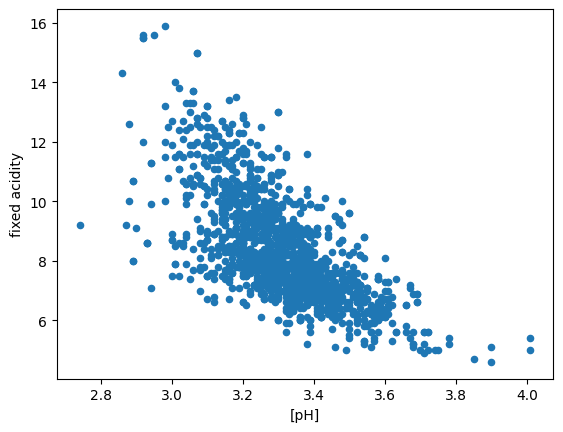

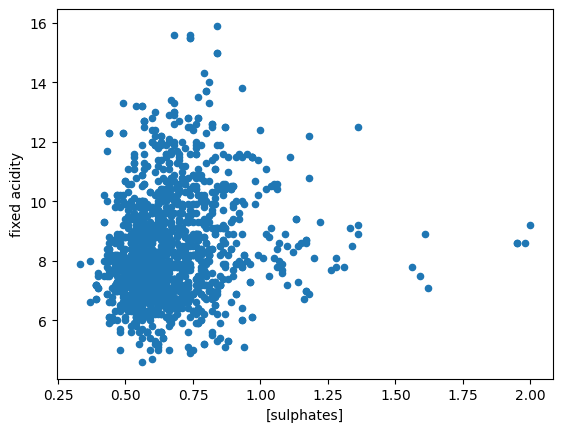

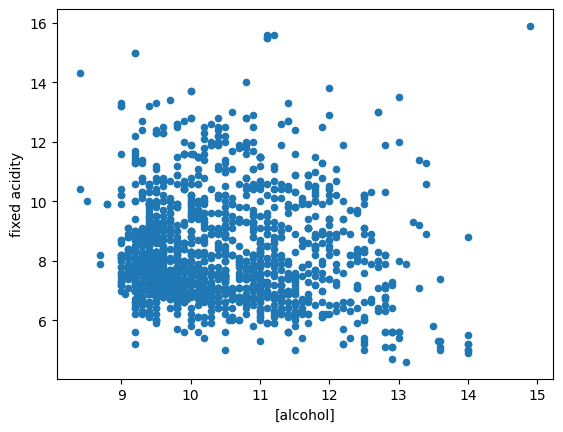

In [ ]:
for i, col in enumerate(dtf.columns.values[:-1]):
 dtf.plot(x=[col], y='fixed acidity', kind='scatter')
plt.show()

In [ ]:
X = dtf.drop(['fixed acidity'], axis=1)
y = dtf['fixed acidity']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1599, 11) | y shape: (1599,) 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)


In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  0.6634
  R2: 0.8437
 Adjusted R2: 0.8381
 Cross Validated R2: 0.8729


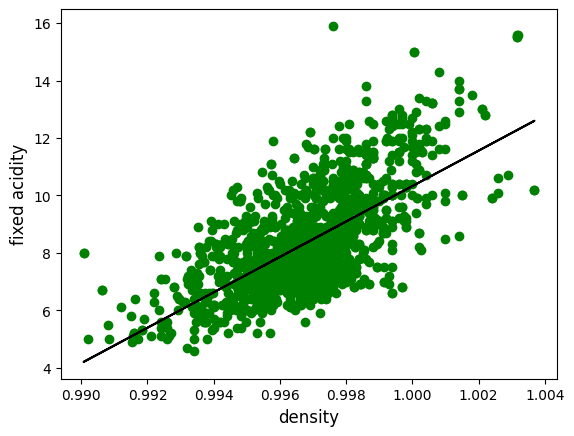

In [ ]:
X2 = dtf['density'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['fixed acidity'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('fixed acidity', size=12)
plt.xlabel('density', size=12)
plt.show()

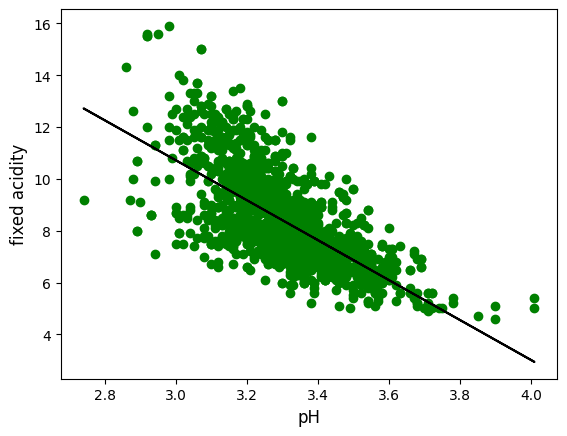

In [ ]:
X2 = dtf['pH'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['fixed acidity'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('fixed acidity', size=12)
plt.xlabel('pH', size=12)
plt.show()

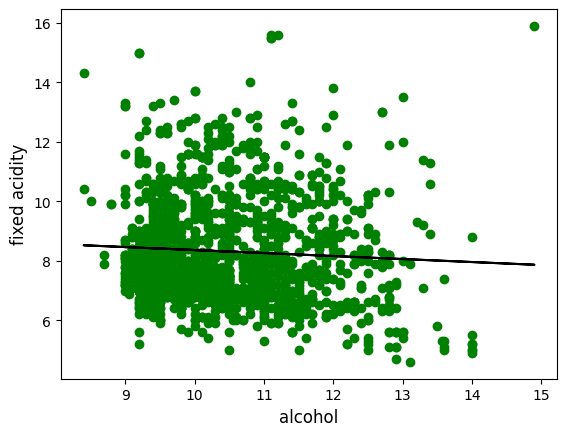

In [ ]:
X2 = dtf['alcohol'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['fixed acidity'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('fixed acidity', size=12)
plt.xlabel('alcohol', size=12)
plt.show()

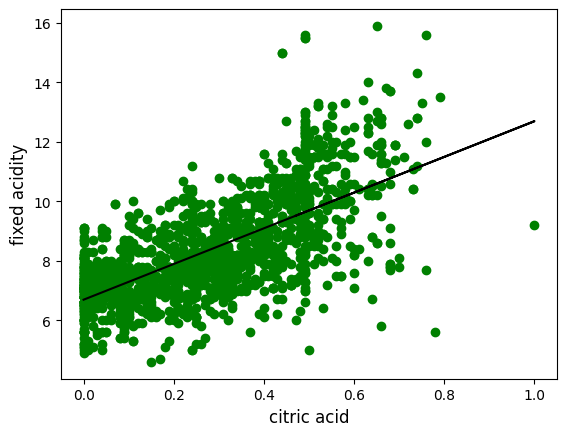

In [ ]:
X2 = dtf['citric acid'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['fixed acidity'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('fixed acidity', size=12)
plt.xlabel('citric acid', size=12)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor



# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.884
  R2: 0.7225
 Adjusted R2: 0.7125
 Cross Validated R2: 0.7517


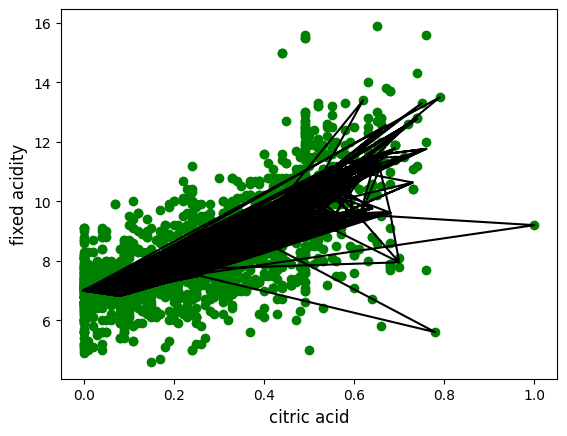

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X2 = dtf['citric acid'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['fixed acidity'].values

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('fixed acidity', size=12)
plt.xlabel('citric acid', size=12)
plt.show()

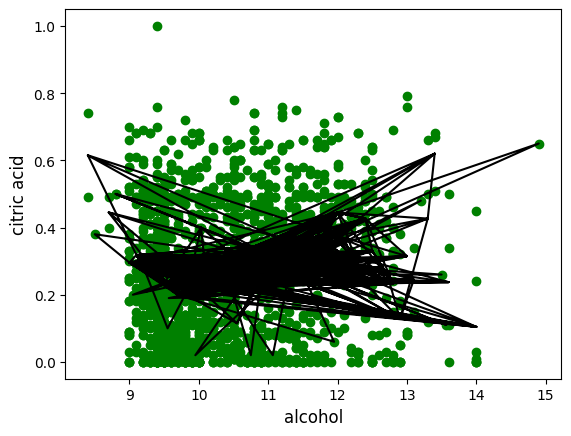

In [ ]:
X2 = dtf['alcohol'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['fixed acidity'].values

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('fixed acidity', size=12)
plt.xlabel('alcohol', size=12)
plt.show()

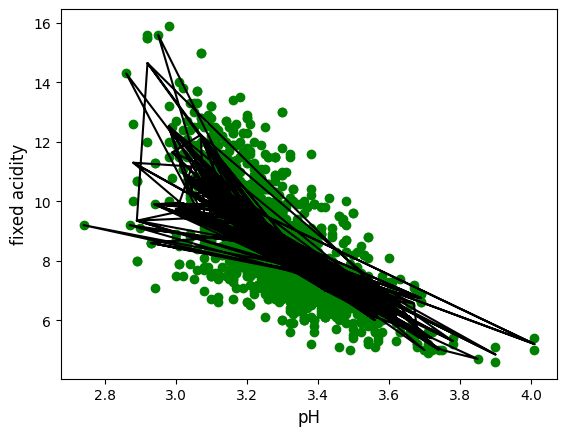

In [ ]:
X2 = dtf['pH'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['fixed acidity'].values

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('fixed acidity', size=12)
plt.xlabel('pH', size=12)
plt.show()

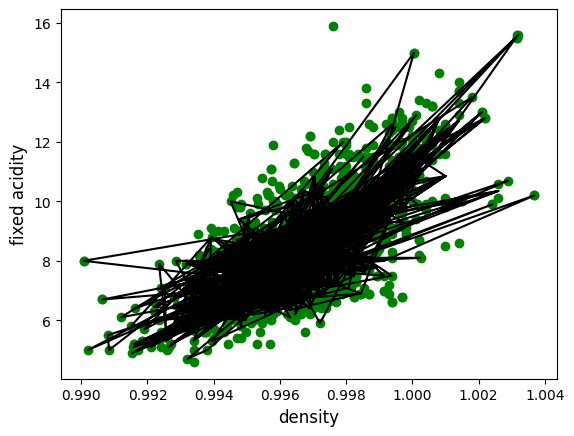

In [ ]:
X2 = dtf['density'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['fixed acidity'].values

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('fixed acidity', size=12)
plt.xlabel('density', size=12)
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.00001, l1_ratio=0.9)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)


RMSE:  0.726
  R2: 0.8128
 Adjusted R2: 0.8061
 Cross Validated R2: 0.8374


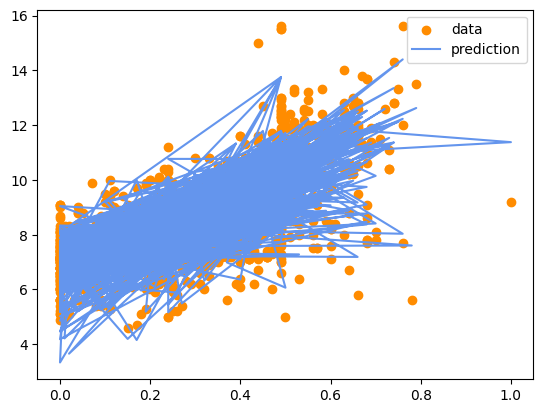

In [ ]:
plt.scatter(X_train["citric acid"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["citric acid"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

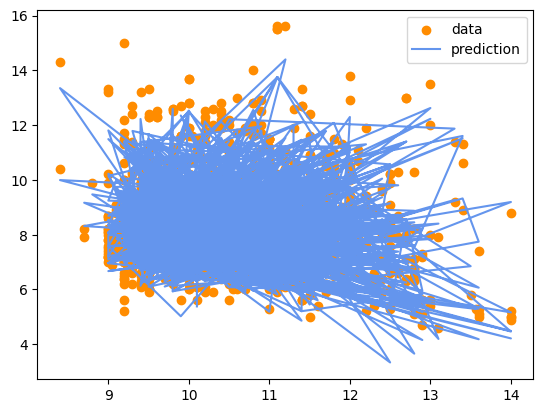

In [ ]:
plt.scatter(X_train["alcohol"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["alcohol"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

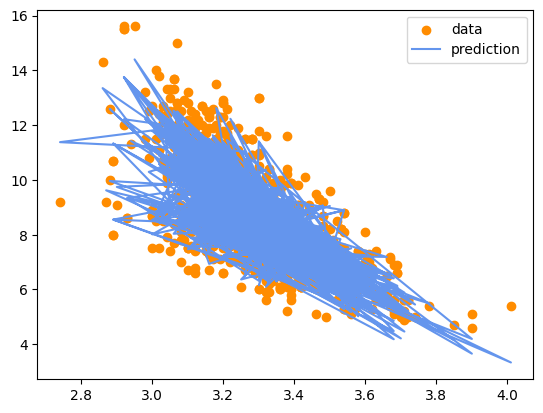

In [ ]:
plt.scatter(X_train["pH"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["pH"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

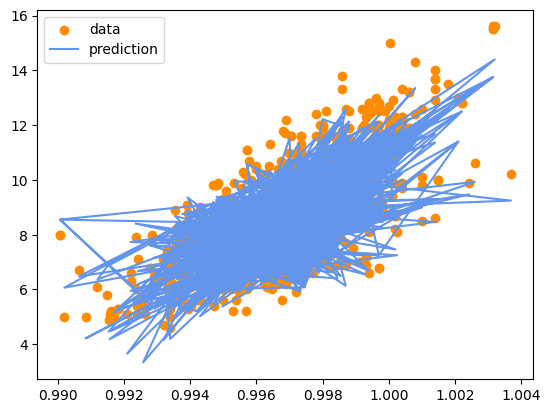

In [ ]:
plt.scatter(X_train["density"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["density"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()